# EDA

## GDP Per Capita
(gross domastic production)

#### Import the necessary libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

#### import dataset

In [22]:
df= pd.read_csv(r"D:\DATASCIENCE\MYPROJECTS\gdp_per_capita.csv")
print(df)

             Entity Code  Year  GDP per capita  \
0       Afghanistan  AFG  2005        964.4081   
1       Afghanistan  AFG  2006       1057.0966   
2       Afghanistan  AFG  2007       1259.9967   
3       Afghanistan  AFG  2008       1319.6074   
4       Afghanistan  AFG  2009       1557.3207   
...             ...  ...   ...             ...   
147610     Zimbabwe  ZWE  2018       1900.1992   
147611     Zimbabwe  ZWE  2019       1753.0244   
147612     Zimbabwe  ZWE  2020       1585.9728   
147613     Zimbabwe  ZWE  2021       1687.2532   
147614     Zimbabwe  ZWE  2022       1703.5294   

        Value of global merchandise exports as a share of GDP  \
0                                                 6.11945       
1                                                 5.89436       
2                                                 4.61202       
3                                                 5.11368       
4                                                 3.93394       
...      

### Data cleaning

In [23]:
# Check whether there are any missing values
print(df.isna().sum())

Entity                                                        0
Code                                                     136207
Year                                                          0
GDP per capita                                                0
Value of global merchandise exports as a share of GDP     15019
Government expenditure (% of GDP)                        139202
Trade as a Share of GDP                                    3886
Inflation, consumer prices (annual %)                      3884
dtype: int64


In [24]:
df = df.drop(columns=["Code", "Government expenditure (% of GDP)"])
# country Code (136,207 missing) → Almost unusable. Drop it unless you specifically need country codes.
# Government expenditure (% of GDP) (139,202 missing) → Nearly all missing. Best to drop.

In [25]:
df["Trade as a Share of GDP"].fillna(df["Trade as a Share of GDP"].median(), inplace=True)
#calculates the median of the column (ignoring NaNs) and replaces all missing values with median

In [26]:
df.sort_values(by=["Entity","Year"], inplace=True)
df["Inflation, consumer prices (annual %)"].fillna(method="ffill", inplace=True)
df["Inflation, consumer prices (annual %)"].fillna(method="bfill", inplace=True)
#- ffill (forward fill) → fills missing values with the last known value for that country.
# - bfill (backward fill) → fills remaining missing values with the next available value


In [27]:
df["Value of global merchandise exports as a share of GDP"] = (
    df.groupby("Entity")["Value of global merchandise exports as a share of GDP"]
      .transform(lambda x: x.fillna(x.mean()))
)
# lambda x: x.fillna(x.mean()) → fills missing values in each country’s series with that country’s mean.


### Data understanding

In [28]:
# Basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147615 entries, 0 to 147614
Data columns (total 6 columns):
 #   Column                                                 Non-Null Count   Dtype  
---  ------                                                 --------------   -----  
 0   Entity                                                 147615 non-null  object 
 1   Year                                                   147615 non-null  int64  
 2   GDP per capita                                         147615 non-null  float64
 3   Value of global merchandise exports as a share of GDP  147506 non-null  float64
 4   Trade as a Share of GDP                                147615 non-null  float64
 5   Inflation, consumer prices (annual %)                  147615 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 7.9+ MB
None


In [29]:
# Use summary statistics to understand distributions.
print(df.describe())

                Year  GDP per capita  \
count  147615.000000   147615.000000   
mean     1995.451099     8770.541322   
std        18.627627    11891.913694   
min      1800.000000      403.601900   
25%      1986.000000     1766.000000   
50%      2000.000000     3204.651900   
75%      2010.000000     9961.689500   
max      2022.000000   160051.230000   

       Value of global merchandise exports as a share of GDP  \
count                                      147506.000000       
mean                                           19.803692       
std                                             9.812684       
min                                             0.044430       
25%                                            13.809130       
50%                                            18.309360       
75%                                            23.540930       
max                                           302.306340       

       Trade as a Share of GDP  Inflation, consumer prices (an

#### Correlation and Economic Interdependence

In [30]:
# Select only the numerical columns you want
num_features = [
    "GDP per capita",
    "Value of global merchandise exports as a share of GDP",
    "Trade as a Share of GDP",
    "Inflation, consumer prices (annual %)"
]

# Compute correlation matrix
corr_matrix = df[num_features].corr()

print(corr_matrix)

                                                    GDP per capita  \
GDP per capita                                            1.000000   
Value of global merchandise exports as a share ...        0.115442   
Trade as a Share of GDP                                   0.158420   
Inflation, consumer prices (annual %)                    -0.013675   

                                                    Value of global merchandise exports as a share of GDP  \
GDP per capita                                                                               0.115442       
Value of global merchandise exports as a share ...                                           1.000000       
Trade as a Share of GDP                                                                      0.361446       
Inflation, consumer prices (annual %)                                                        0.000004       

                                                    Trade as a Share of GDP  \
GDP per capita          

#### Visualize with Heatmap

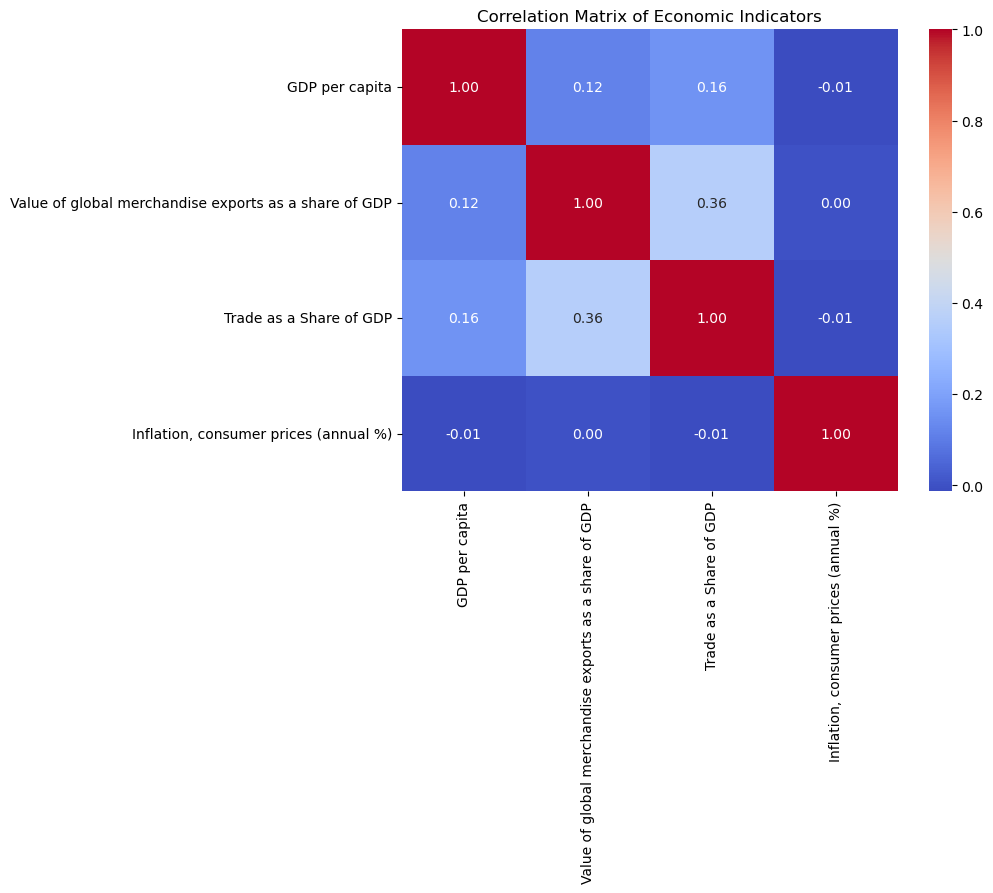

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Economic Indicators")
plt.show()


##### Filter the data for a representative period (e.g., 1990 to 2020) and select key comparative groups (e.g., G7 nations vs. BRICS nations, or High-Income vs. Low-Income economies).


In [33]:
#Filter rows between 1990 and 2022:
df_period = df[(df["Year"] >= 1990) & (df["Year"] <= 2022)]
# Define Country Groups:
# G7 Nations
g7 = ["Canada", "France", "Germany", "Italy", "Japan", "United Kingdom", "United States"]
#BRICS Nations
brics = ["Brazil", "Russia", "India", "China", "South Africa"]
# Add a Group Column
def assign_group(entity):
    if entity in g7:
        return "G7"
    elif entity in brics:
        return "BRICS"
    else:
        return "Other"

df_period["Group"] = df_period["Entity"].apply(assign_group)
# Add a income group
def income_group(gdp):
    if gdp >= 20000:
        return "High-Income"
    elif gdp >= 5000:
        return "Middle-Income"
    else:
        return "Low-Income"

df_period["IncomeGroup"] = df_period["GDP per capita"].apply(income_group)
# Comparative Analysis:
#Average GDP per capita by group
df_period.groupby("Group")["GDP per capita"].mean()
#Trade share comparison
df_period.groupby("Group")["Trade as a Share of GDP"].mean()
#Inflation comparison
df_period.groupby("Group")["Inflation, consumer prices (annual %)"].mean()





C:\Users\hp\AppData\Local\Temp\ipykernel_652\1534209071.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_period["Group"] = df_period["Entity"].apply(assign_group)
C:\Users\hp\AppData\Local\Temp\ipykernel_652\1534209071.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_period["IncomeGroup"] = df_period["GDP per capita"].apply(income_group)


Group
BRICS    66.585359
G7        2.027177
Other     6.062859
Name: Inflation, consumer prices (annual %), dtype: float64

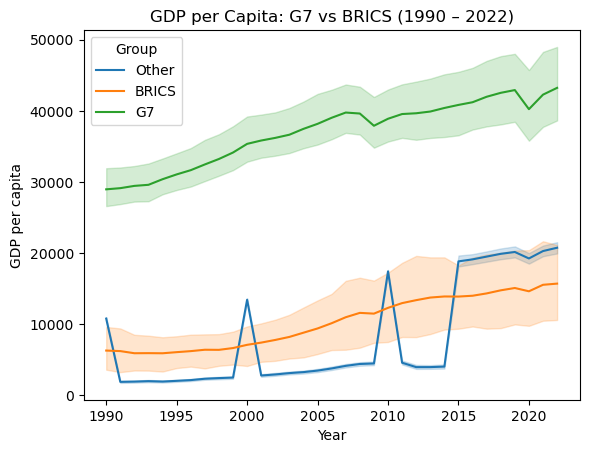

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(x="Year", y="GDP per capita", hue="Group", data=df_period)
plt.title("GDP per Capita: G7 vs BRICS (1990 – 2022)")
plt.show()

#### Analyze the time series of Trade as a Share of GDP for major global entities

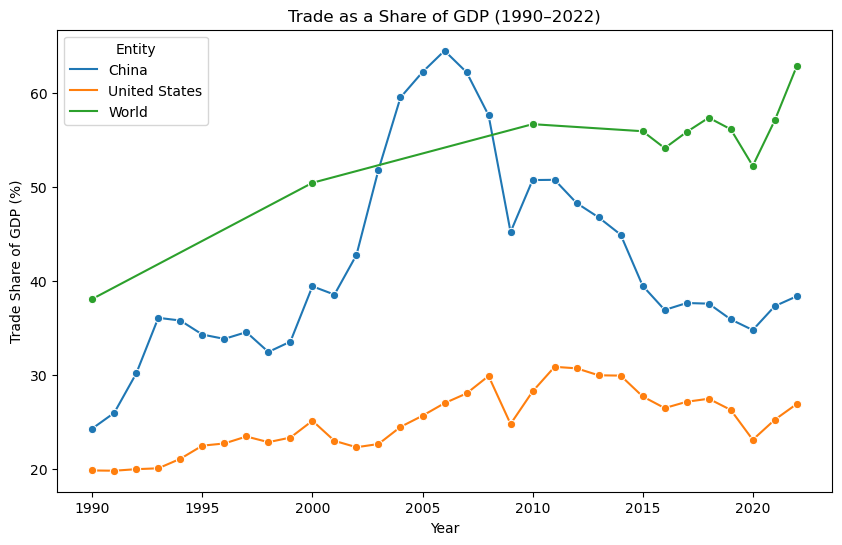

In [35]:
entities = ["United States", "China", "World"]

df_trade = df_period[df_period["Entity"].isin(entities)][["Entity", "Year", "Trade as a Share of GDP"]]

# selected US,china and world for the refarance

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.lineplot(x="Year", y="Trade as a Share of GDP", hue="Entity", data=df_trade, marker="o")
plt.title("Trade as a Share of GDP (1990–2022)")
plt.ylabel("Trade Share of GDP (%)")
plt.xlabel("Year")
plt.legend(title="Entity")
plt.show()

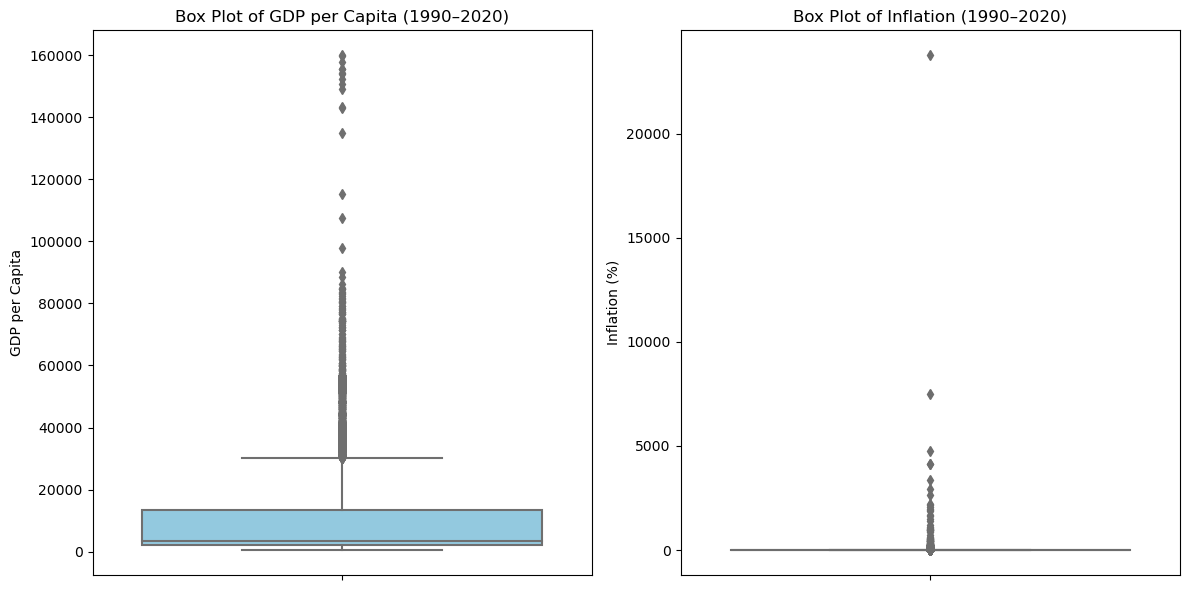

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

# GDP per capita box plot
plt.subplot(1,2,1)
sns.boxplot(y=df_period["GDP per capita"], color="skyblue")
plt.title("Box Plot of GDP per Capita (1990–2020)")
plt.ylabel("GDP per Capita")

# Inflation box plot
plt.subplot(1,2,2)
sns.boxplot(y=df_period["Inflation, consumer prices (annual %)"], color="salmon")
plt.title("Box Plot of Inflation (1990–2020)")
plt.ylabel("Inflation (%)")

plt.tight_layout()
plt.show()

" The box plots reveal that while most countries have moderate GDP per capita and inflation, a few extreme outliers exist — high-income economies on the GDP side and hyperinflation cases on the inflation side.”



### Final Conclusion:


This project successfully established the foundational economic relationships and major global trends within the dataset. The analysis provides crucial context for further comparative studies, such as contrasting the growth of G7 vs. BRICS nations or assessing the long-term impact of trade openness on economic stability. The findings strongly suggest that while trade is a significant factor in driving wealth, a country's economic structure determines its vulnerability and response to global trade fluctuations.